In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk as nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from afinn import Afinn
af = Afinn()
%matplotlib inline
tknzer = TweetTokenizer()
stop_words = set(stopwords.words('english'))
stop_words.update(["bout", "em", "cause"])

In [292]:
df = pd.read_csv('lyrics/discography.csv')

In [285]:
albums = ['thank u, next', 'Yours Truly', 'Dangerous Woman', 'My Everything', 'Sweetener']
df = df[df.album.isin(albums)]

In [286]:
total_lyrics = []
non_stop_lyrics = []

for song in df['lyrics']:
    new_lyrics = []
    sent_text = []
    lyrics = song.split("\n")
    for i in lyrics:
        if "[" not in i:
            new_lyrics.append(i.replace("\r", "").lower().strip())
    for line in new_lyrics:
        sent_text += tknzer.tokenize(line)
    non_stop_lyrics.append(sent_text)
    filtered_text = [w for w in sent_text if not w in stop_words]
    filtered_2_text = [w for w in filtered_text if w.isalpha()]
    total_lyrics.append(filtered_2_text)
    
df['token_lyrics'] = total_lyrics
df['non_stop_lyrics'] = non_stop_lyrics

In [111]:
cloud_mask = np.array(Image.open("img/cloud.png"))
ariana_mask = np.array(Image.open("img/ariana.jpg"))
heart_mask = np.array(Image.open("img/heart.jpg"))

In [118]:
all_tokens = []
for song in df['token_lyrics']:
    for word in song:
        all_tokens.append(word)

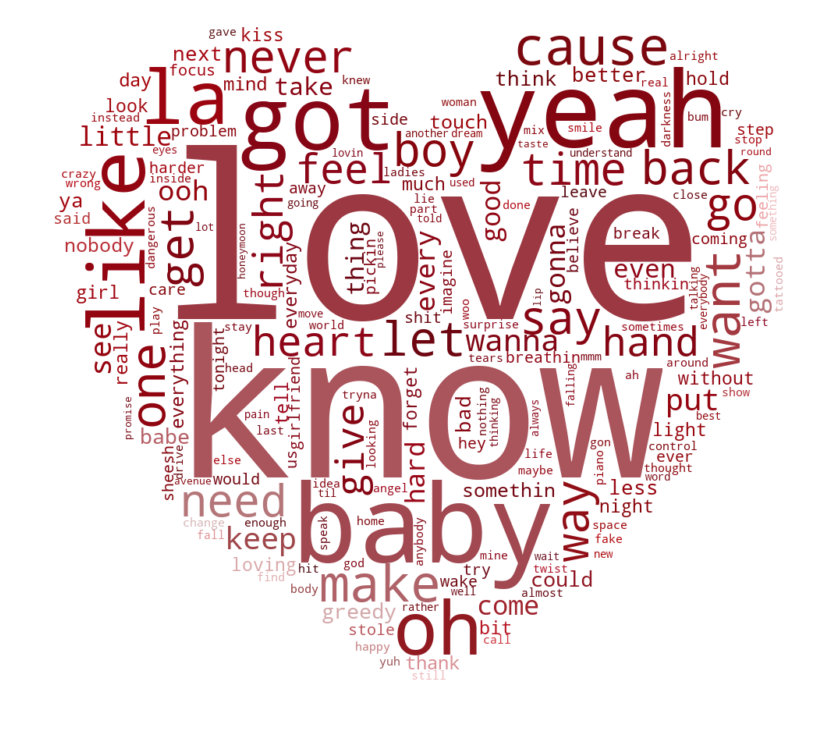

In [116]:
wordcloud = WordCloud(collocations=False, mask = heart_mask, width = 2000, height = 1000, stopwords = stop_words, background_color="white", colormap = "Blues").generate(" ".join(text))

image_colors = ImageColorGenerator(heart_mask)

plt.figure(figsize=[20, 10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [117]:
wordcloud.to_file("img/total3.png")

In [177]:
df

,album,image,lyrics,title,year,token_lyrics
0,"thank u, next",https://images.genius.com/51d06888c4262227293e...,"[Verse 1]\r\nYeah, breakfast at Tiffany's and ...",7 rings,2019-01-18,"[yeah, breakfast, at, tiffany's, and, bottles,..."
2,Yours Truly,https://images.rapgenius.com/7f68beb736101c0b0...,[Verse 1: Ariana Grande]\r\nI'd like to say we...,Almost Is Never Enough,2013-08-19,"[i'd, like, to, say, we, gave, it, a, try, i'd..."
3,Yours Truly,https://images.genius.com/fddd96754f2a82832a6d...,"[Verse 1]\r\nBaby, I got love for thee so deep...",Baby I,2013-07-22,"[baby, i, got, love, for, thee, so, deep, insi..."
4,Dangerous Woman,https://images.genius.com/a0457334423b0d9e793d...,"[Verse 1]\r\nBoy, you know that you drive me c...",Bad Decisions,2016-05-20,"[boy, you, know, that, you, drive, me, crazy, ..."
5,Dangerous Woman,https://images.genius.com/a0457334423b0d9e793d...,[Verse 1]\r\nMidnight shadows\r\nWhen finding ...,Be Alright,2016-03-18,"[midnight, shadows, when, finding, love, is, a..."
7,My Everything,https://images.genius.com/3187877fdee0425edaa1...,[Chorus]\r\nIf you know how to be my lover\r\n...,Be My Baby,2014-08-22,"[if, you, know, how, to, be, my, lover, maybe,..."
8,My Everything,https://images.genius.com/3187877fdee0425edaa1...,[Verse 1: Ariana Grande]\r\nHow soon do we for...,Best Mistake,2014-08-12,"[how, soon, do, we, forget, how, we, felt, dea..."
9,Yours Truly,https://images.rapgenius.com/7f68beb736101c0b0...,"[Verse 1]\r\nI told you once, ""Get out my life...",Better Left Unsaid,2013-08-30,"[i, told, you, once, get, out, my, life, i, do..."
13,My Everything,https://images.genius.com/7469b198c271e3a00f59...,[Click here to read how Zedd and Ariana Grande...,Break Free,2014-07-03,"[if, you, want, it, take, it, i, should've, sa..."
14,My Everything,https://images.genius.com/3187877fdee0425edaa1...,"[Produced by Andrew ""Pop"" Wansel and Warren ""O...",Break Your Heart Right Back,2014-08-22,"[i, shoulda, saw, it, coming, i, shoulda, saw,..."


In [287]:
words_list = []
sentence_list = []

for name in albums:
    album_words = []
    album_sent = []
    for song in df[df.album == name]['token_lyrics']:
        album_words += [w for w in song]
    words_list.append(album_words)
    for song in df[df.album == name]['lyrics']:
        new_lyrics = []
        lyrics = song.split("\n")
        for i in lyrics:
            if "[" not in i:
                new_lyrics.append(i.replace("\r", "").strip())
        album_sent += new_lyrics
    sentence_list.append(album_sent)

word_counts = []
unique_counts = []

for i in words_list:
    word_counts.append(len(i))
    unique_counts.append(len(set(i)))

In [288]:
album_df = pd.DataFrame({
    'album_name' : albums,
    'words': words_list,
    'sentences': sentence_list,
    'word_count': word_counts,
    'unique_count': unique_counts
})

In [289]:
sid = SentimentIntensityAnalyzer()
pos_list = []
neg_list = []
neu_list = []

for name in albums:
    num_pos = 0
    num_neg = 0
    num_neu = 0
    for song in album_df[album_df['album_name'] == name]['sentences']:
        for sentence in song:
            comp = sid.polarity_scores(sentence)
            comp = comp['compound']
            if comp >= 0.5:
                num_pos += 1
            elif comp > -0.5 and comp < 0.5:
                num_neu += 1
            else:
                num_neg += 1
    num_total = num_pos + num_neg + num_neu
    per_pos = (num_pos / float(num_total)) * 100
    per_neg = (num_neg / float(num_total)) * 100
    per_neu = (num_neu / float(num_total)) * 100
    pos_list.append(per_pos)
    neg_list.append(per_neg)
    neu_list.append(per_neu)
    
sentiment_df = pd.DataFrame({
    'album_name': albums,
    'positive': pos_list,
    'neutral': neu_list,
    'negative': neg_list
})

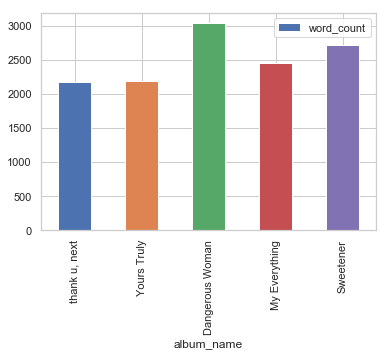

In [290]:
album_df.plot.bar(x = 'album_name', y = 'word_count')
plt.show()

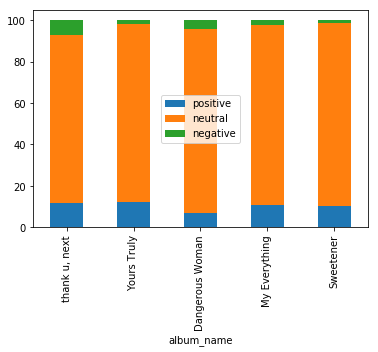

In [208]:
sentiment_df.plot.bar(x = 'album_name', stacked = True)
plt.show()

In [291]:
grouped = df.sort_values(by=['album', 'title'])
word_count = []
unique_count = []
lex_div = []
sentiment_scores = []

for song in grouped['non_stop_lyrics']:
    sentiment_score = [af.score(word) for word in set(song)]
    sentiment_scores.append(sum(sentiment_score))
    word_count.append(len(song))
    unique_count.append(len(set(song)))
    lex_div.append(len(set(song)) / len(song))
    
grouped['word_count'] = word_count
grouped['unique_count'] = unique_count
grouped['lex_div'] = lex_div
grouped['sentiment'] = sentiment_scores

In [272]:
grouped

,album,image,lyrics,title,year,token_lyrics,non_stop_lyrics,word_count,unique_count,lex_div,sentiment
4,Dangerous Woman,https://images.genius.com/a0457334423b0d9e793d...,"[Verse 1]\r\nBoy, you know that you drive me c...",Bad Decisions,2016-05-20,"[boy, know, drive, crazy, one, things, like, k...","[boy, ,, you, know, that, you, drive, me, craz...",507,103,0.203156,-11.0
5,Dangerous Woman,https://images.genius.com/a0457334423b0d9e793d...,[Verse 1]\r\nMidnight shadows\r\nWhen finding ...,Be Alright,2016-03-18,"[midnight, shadows, finding, love, battle, day...","[midnight, shadows, when, finding, love, is, a...",205,65,0.317073,-2.0
16,Dangerous Woman,https://images.genius.com/aa0d665473d0841d1113...,[Verse 1]\r\nDon't need permission\r\nMade my ...,Dangerous Woman,2016-03-11,"[need, permission, made, decision, test, limit...","[don't, need, permission, made, my, decision, ...",494,98,0.198381,1.0
20,Dangerous Woman,https://images.genius.com/cb1ddb60083b8e3f4e4f...,"[Verse 1: Ariana Grande]\r\nAnytime I'm alone,...",Everyday,2016-05-20,"[anytime, alone, help, thinking, want, need, s...","[anytime, i'm, alone, ,, i, can't, help, think...",626,116,0.185304,-1.0
21,Dangerous Woman,https://images.genius.com/9526bbda560f90fbffe1...,[Verse 1]\r\nI know what I came to do\r\nAnd t...,Focus,2015-10-30,"[know, came, gonna, change, go, ahead, talk, t...","[i, know, what, i, came, to, do, and, that, ai...",417,99,0.237410,3.0
23,Dangerous Woman,https://images.genius.com/aa0d665473d0841d1113...,"[Intro]\r\nGreedy, ooh\r\nYou know that I'm gr...",Greedy,2016-05-20,"[greedy, ooh, know, greedy, love, boy, give, f...","[greedy, ,, ooh, you, know, that, i'm, greedy,...",505,80,0.158416,7.0
27,Dangerous Woman,https://images.genius.com/cb1ddb60083b8e3f4e4f...,[Verse 1]\r\nUsed to cry 'bout some crazy shit...,I Don't Care,2016-05-20,"[used, cry, crazy, shit, used, feel, obligated...","[used, to, cry, ', bout, some, crazy, shit, be...",139,59,0.424460,-1.0
28,Dangerous Woman,https://images.genius.com/8cb124754c813c5231a3...,"[Verse 1]\r\nI'm so into you, I can barely bre...",Into You,2016-05-06,"[barely, breathe, wanna, fall, deep, close, cl...","[i'm, so, into, you, ,, i, can, barely, breath...",523,111,0.212237,-4.0
30,Dangerous Woman,https://images.genius.com/08c59196c0a0d76c813a...,"[Verse 1]\r\nYeah, you really tried\r\nBut I w...",Jason's Song (Gave It Away),2016-05-20,"[yeah, really, tried, blind, lies, told, boy, ...","[yeah, ,, you, really, tried, but, i, was, bli...",332,105,0.316265,1.0
32,Dangerous Woman,https://images.genius.com/42bc34fde7d75334c999...,"[Verse 1]\r\nSay you could turn me on\r\nBoy, ...",Knew Better (Part 2),2016-09-15,"[say, could, turn, boy, say, wanna, believe, c...","[say, you, could, turn, me, on, boy, ,, but, t...",417,112,0.268585,-7.0


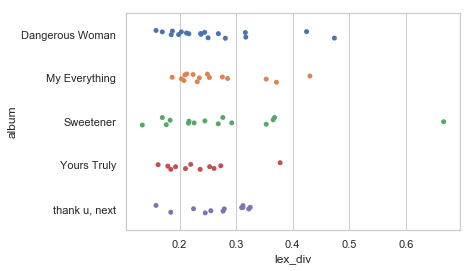

In [236]:
sns.set(style="whitegrid")
ax = sns.stripplot(x = 'lex_div', y = 'album', data = grouped, jitter = True)

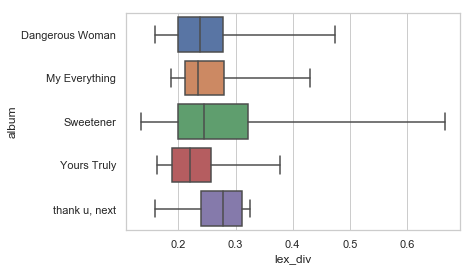

In [237]:
 ax = sns.boxplot(x="lex_div", y="album", data=grouped, whis=np.inf)

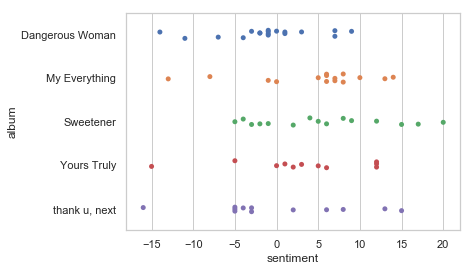

In [262]:
ax = sns.stripplot(x='sentiment', y="album", data= grouped)


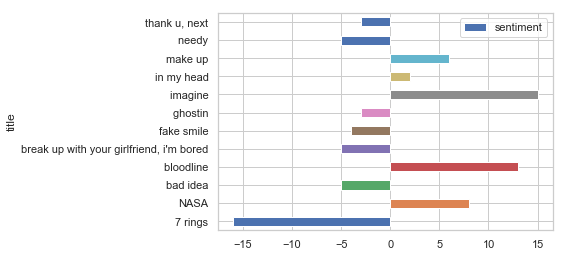

In [268]:
thanku = grouped[grouped.album == 'thank u, next']
thanku.plot.barh(x = 'title', y = 'sentiment')